# Full test ETNN configs determined by optuna

## Importing section

In [1]:
import os
import sys

from etnn.tools.param_calc_config import calc_n_params_config

sys.path.insert(0, os.path.pardir)

In [2]:
import pandas as pd

from etnn.routines.run_config import run_config

import matplotlib.pyplot as plt

from etnn.tools.training_tools import ConfigStore

## Definitions section

In [3]:
def create_plot(
        config_idx: int,
        what: str = "r2"
) -> None:
    plt.figure()
    # load data
    STORAGE_FOLDER = os.path.join("../../results", str(config_idx))
    df_measures = pd.read_csv(os.path.join(STORAGE_FOLDER, "accuracies.csv"))

    # Plot the initial data
    for config_id in df_measures.config_id.unique():
        # make subdataset for config id
        sub_df = df_measures[df_measures.config_id == config_id]

        # plot train test and val
        for mode in ['train', 'test', 'val']:
            # plot training
            if f"{mode}_{what}" in sub_df.columns:
                plt.plot(sub_df.epoch, sub_df[f"{mode}_{what}"], label=f"{config_id}_{mode}-{what}")

    plt.title(f"{what} plot")
    plt.xlabel("epoch")
    plt.ylabel("score")
    if what == "r2":
        plt.ylim(-1, +1)
    elif what == "loss":
        plt.yscale('log')
    plt.legend()
    plt.show()

## DS size 10

Rank 1 parameter configuration: Unnamed: 0                                      45
number                                          45
value                                    -1.478535
datetime_start          2024-05-25 11:29:38.140130
datetime_complete       2024-05-25 11:29:38.669690
duration                    0 days 00:00:00.529560
params_batcher                                True
params_hidden_dim                              368
params_k                                         4
params_learning_rate                      0.001244
state                                     COMPLETE
Name: 45, dtype: object


100%|██████████| 300/300 [00:02<00:00, 116.85it/s]


Parameters etnn: 1041441
Parameters baseline: 1089879


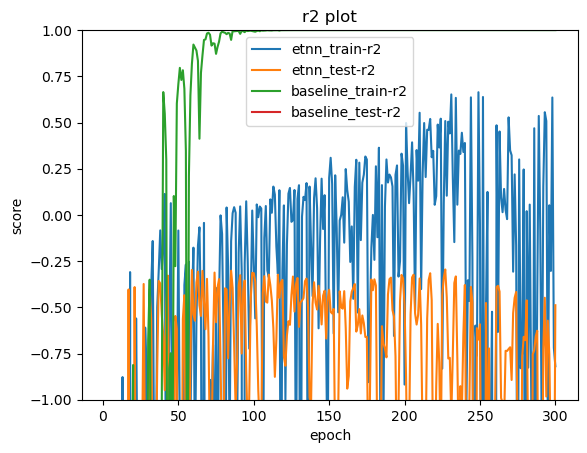

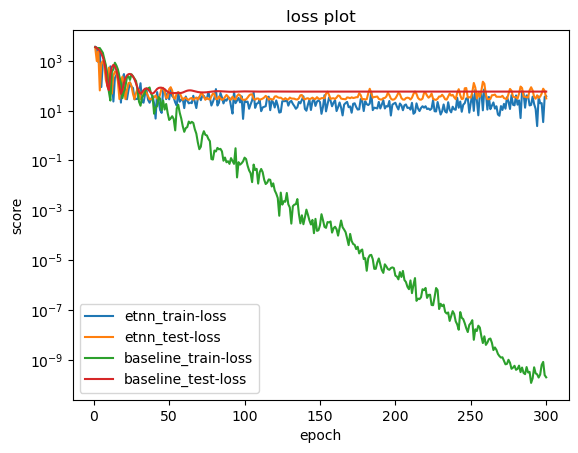

Rank 2 parameter configuration: Unnamed: 0                                      21
number                                          21
value                                    -1.535831
datetime_start          2024-05-25 11:29:24.983109
datetime_complete       2024-05-25 11:29:25.563785
duration                    0 days 00:00:00.580676
params_batcher                                True
params_hidden_dim                              112
params_k                                         4
params_learning_rate                      0.002695
state                                     COMPLETE
Name: 21, dtype: object


100%|██████████| 300/300 [00:02<00:00, 115.62it/s]


Parameters etnn: 98337
Parameters baseline: 102131


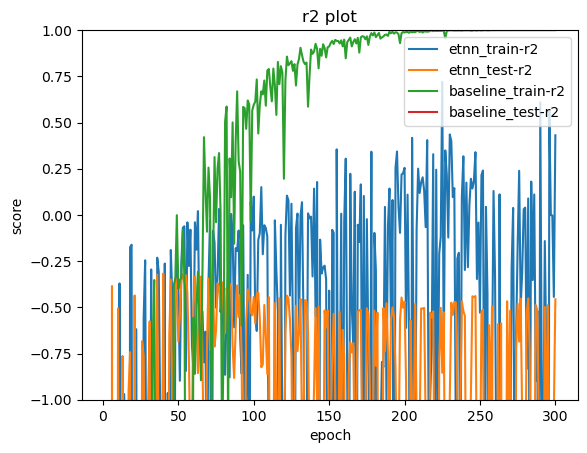

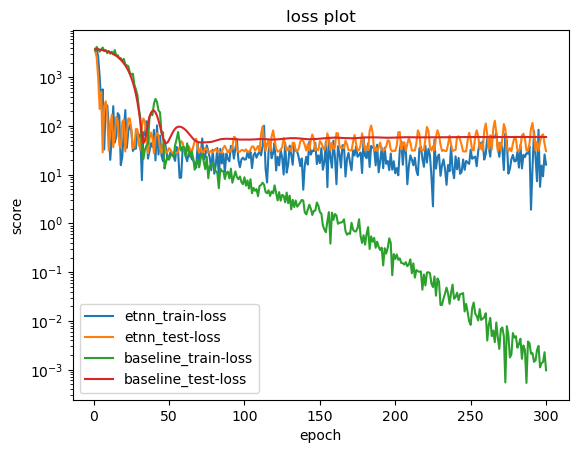

Rank 3 parameter configuration: Unnamed: 0                                      25
number                                          25
value                                    -1.797585
datetime_start          2024-05-25 11:29:27.189446
datetime_complete       2024-05-25 11:29:27.728957
duration                    0 days 00:00:00.539511
params_batcher                                True
params_hidden_dim                              256
params_k                                         4
params_learning_rate                      0.003716
state                                     COMPLETE
Name: 25, dtype: object


100%|██████████| 300/300 [00:02<00:00, 114.40it/s]


Parameters etnn: 505857
Parameters baseline: 529190


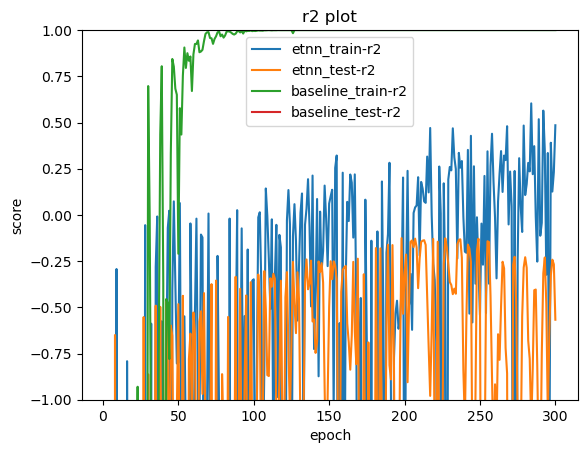

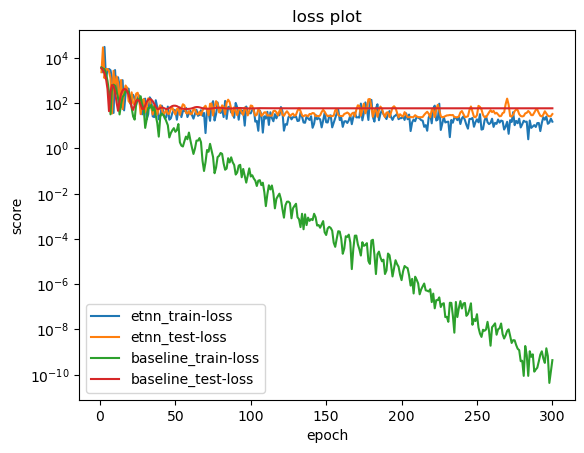

In [4]:
dataset_size = 10
# define label to show
label = "default"

# load config storage
config_table = pd.read_csv(f"study_label-default_post-normalized_ds-{dataset_size}.csv")

# sort config storage
config_table = config_table.sort_values(by=['value'], ascending=False)

# iterate over top 3 best configs
for i in range(3):
    # get entry from dataframe
    entry = config_table.iloc[i]

    # print information to console
    print(f"Rank {i+1} parameter configuration: {entry}")

    # setup config
    config = ConfigStore(
        in_dim=15,
        hidden_dim=int(entry.params_hidden_dim),
        out_dim=1,
        k=int(entry.params_k),
        dataset=-2,
        ds_size=dataset_size,
        num_gondolas=10,
        num_part_pg=5,
        loss_name='mse',
        optimizer_name='adam',
        num_max_epochs=300,
        learning_rate=float(entry.params_learning_rate),
        batch_size=1024,
        early_stop_tol=5,
        use_equal_batcher=bool(entry.params_batcher),
        seed=420,
        label_type=label,
        final_label_factor=1/1000
    )

    # run config and retrieve idx
    config_idx = run_config(
        config=config,
        dataset_path="../../datasets",
        verbose=True,
        results_folder="../../results",
        check_duplicate=True
    )

    # print number of parameters
    n_params_etnn, n_params_baseline = calc_n_params_config(config)
    print(f"Parameters etnn: {n_params_etnn}\nParameters baseline: {n_params_baseline}")

    # plot results
    create_plot(config_idx, what="r2")
    create_plot(config_idx, what="loss")

## DS size 100

Rank 1 parameter configuration: Unnamed: 0                                       9
number                                           9
value                                      -0.2089
datetime_start          2024-05-25 11:31:02.550046
datetime_complete       2024-05-25 11:31:04.192343
duration                    0 days 00:00:01.642297
params_batcher                               False
params_hidden_dim                              432
params_k                                         5
params_learning_rate                      0.001137
state                                     COMPLETE
Name: 9, dtype: object


100%|██████████| 300/300 [00:13<00:00, 22.43it/s]


Parameters etnn: 1620433
Parameters baseline: 1700891


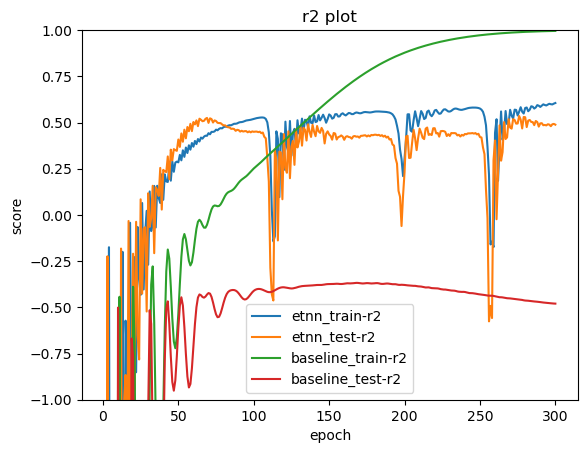

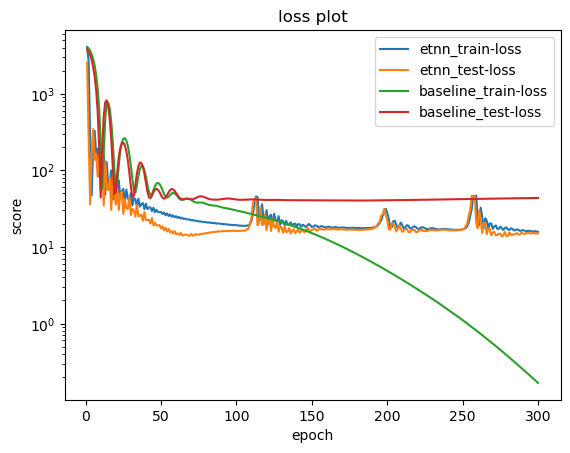

Rank 2 parameter configuration: Unnamed: 0                                      23
number                                          23
value                                    -0.213837
datetime_start          2024-05-25 11:31:22.980297
datetime_complete       2024-05-25 11:31:24.404790
duration                    0 days 00:00:01.424493
params_batcher                                True
params_hidden_dim                              288
params_k                                         2
params_learning_rate                      0.001842
state                                     COMPLETE
Name: 23, dtype: object


100%|██████████| 300/300 [00:13<00:00, 21.91it/s]


Parameters etnn: 472897
Parameters baseline: 496691


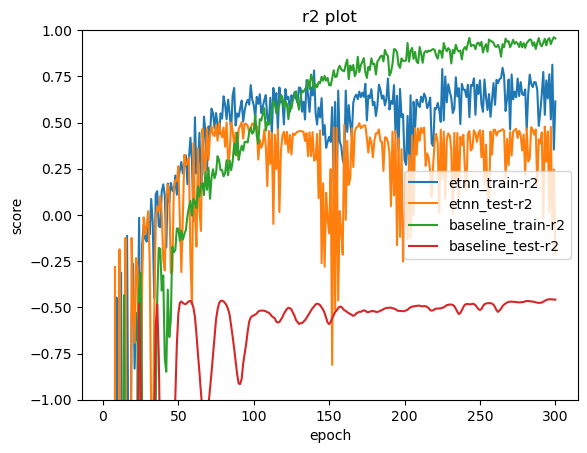

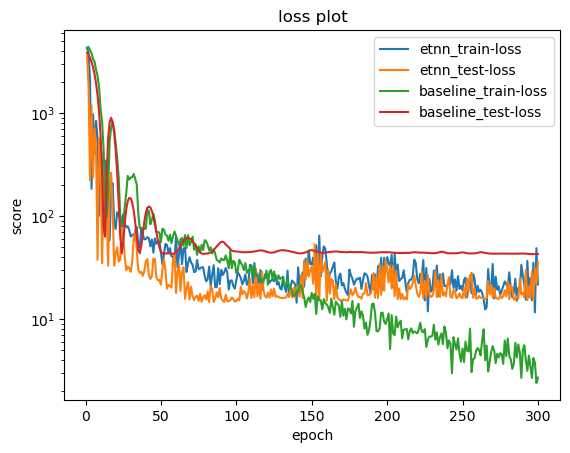

Rank 3 parameter configuration: Unnamed: 0                                      11
number                                          11
value                                    -0.277825
datetime_start          2024-05-25 11:31:05.709220
datetime_complete       2024-05-25 11:31:07.045306
duration                    0 days 00:00:01.336086
params_batcher                                True
params_hidden_dim                              336
params_k                                         1
params_learning_rate                      0.003931
state                                     COMPLETE
Name: 11, dtype: object


100%|██████████| 300/300 [00:13<00:00, 22.66it/s]


Parameters etnn: 529201
Parameters baseline: 553277


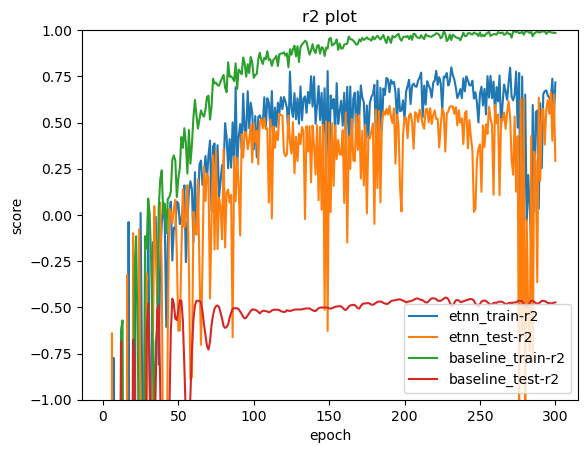

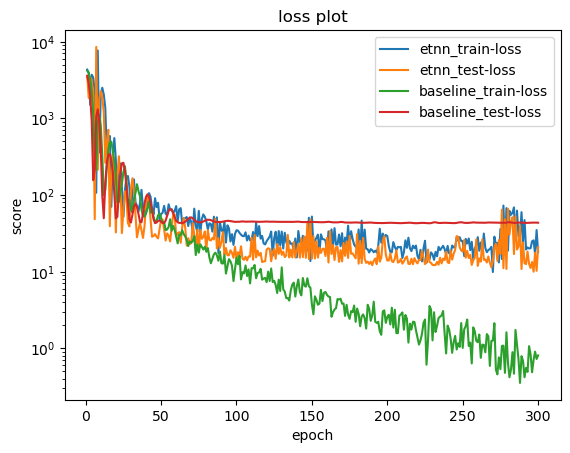

In [5]:
dataset_size = 100
# define label to show
label = "default"

# load config storage
config_table = pd.read_csv(f"study_label-default_post-normalized_ds-{dataset_size}.csv")

# sort config storage
config_table = config_table.sort_values(by=['value'], ascending=False)

# iterate over top 3 best configs
for i in range(3):
    # get entry from dataframe
    entry = config_table.iloc[i]

    # print information to console
    print(f"Rank {i+1} parameter configuration: {entry}")

    # setup config
    config = ConfigStore(
        in_dim=15,
        hidden_dim=int(entry.params_hidden_dim),
        out_dim=1,
        k=int(entry.params_k),
        dataset=-2,
        ds_size=dataset_size,
        num_gondolas=10,
        num_part_pg=5,
        loss_name='mse',
        optimizer_name='adam',
        num_max_epochs=300,
        learning_rate=float(entry.params_learning_rate),
        batch_size=1024,
        early_stop_tol=5,
        use_equal_batcher=bool(entry.params_batcher),
        seed=420,
        label_type=label,
        final_label_factor=1/1000
    )

    # run config and retrieve idx
    config_idx = run_config(
        config=config,
        dataset_path="../../datasets",
        verbose=True,
        results_folder="../../results",
        check_duplicate=True
    )

    # print number of parameters
    n_params_etnn, n_params_baseline = calc_n_params_config(config)
    print(f"Parameters etnn: {n_params_etnn}\nParameters baseline: {n_params_baseline}")

    # plot results
    create_plot(config_idx, what="r2")
    create_plot(config_idx, what="loss")

## DS size 1000

Rank 1 parameter configuration: Unnamed: 0                                      46
number                                          46
value                                    -0.235964
datetime_start          2024-05-25 11:40:05.383346
datetime_complete       2024-05-25 11:40:16.027079
duration                    0 days 00:00:10.643733
params_batcher                                True
params_hidden_dim                              192
params_k                                         1
params_learning_rate                      0.007198
state                                     COMPLETE
Name: 46, dtype: object


100%|██████████| 300/300 [02:12<00:00,  2.27it/s]

Parameters etnn: 174529
Parameters baseline: 181573


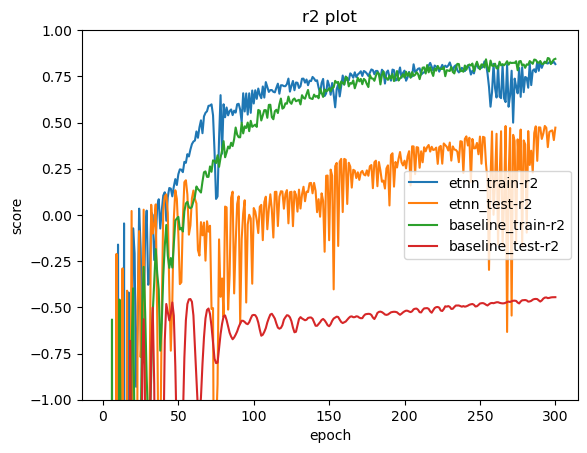

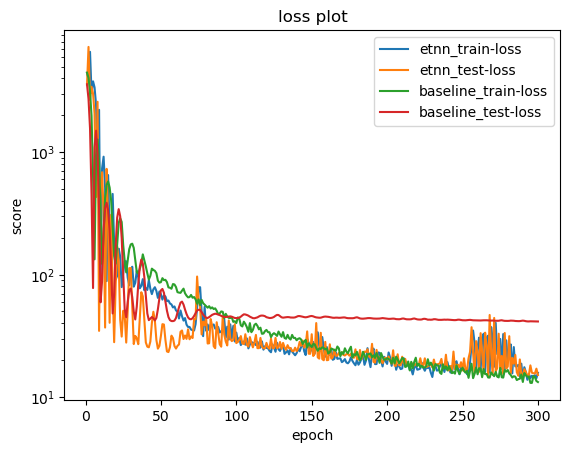

Rank 2 parameter configuration: Unnamed: 0                                      45
number                                          45
value                                    -0.424983
datetime_start          2024-05-25 11:39:55.585703
datetime_complete       2024-05-25 11:40:05.382346
duration                    0 days 00:00:09.796643
params_batcher                                True
params_hidden_dim                              176
params_k                                         1
params_learning_rate                      0.002444
state                                     COMPLETE
Name: 45, dtype: object


100%|██████████| 300/300 [02:16<00:00,  2.20it/s]

Parameters etnn: 146961
Parameters baseline: 153794


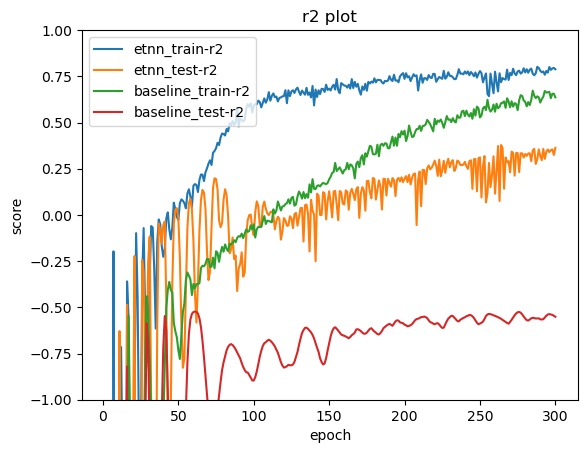

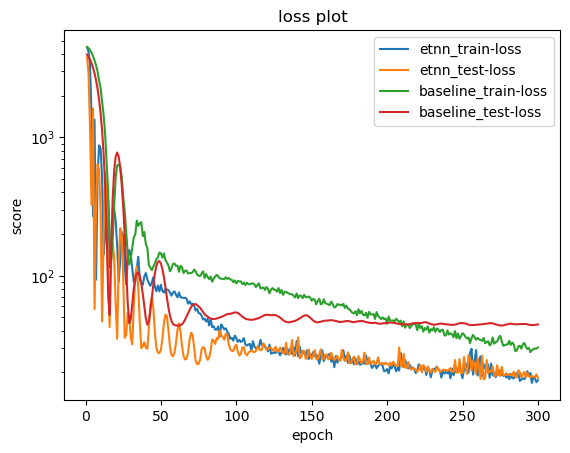

Rank 3 parameter configuration: Unnamed: 0                                       9
number                                           9
value                                    -0.634282
datetime_start          2024-05-25 11:33:41.025328
datetime_complete       2024-05-25 11:33:50.955201
duration                    0 days 00:00:09.929873
params_batcher                                True
params_hidden_dim                               64
params_k                                         1
params_learning_rate                      0.005497
state                                     COMPLETE
Name: 9, dtype: object


100%|██████████| 300/300 [02:17<00:00,  2.19it/s]

Parameters etnn: 20289
Parameters baseline: 21179


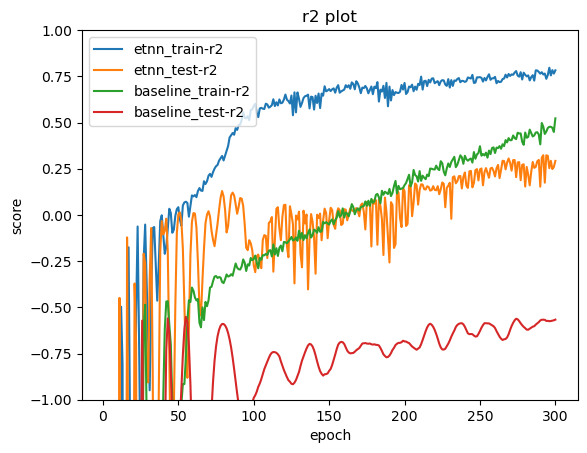

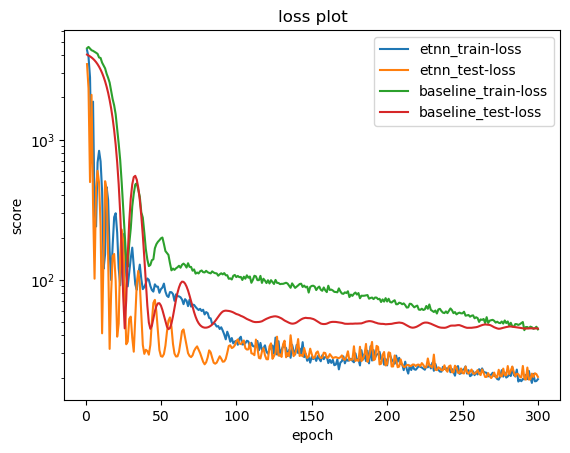

In [6]:
dataset_size = 1000
# define label to show
label = "default"

# load config storage
config_table = pd.read_csv(f"study_label-default_post-normalized_ds-{dataset_size}.csv")

# sort config storage
config_table = config_table.sort_values(by=['value'], ascending=False)

# iterate over top 3 best configs
for i in range(3):
    # get entry from dataframe
    entry = config_table.iloc[i]

    # print information to console
    print(f"Rank {i+1} parameter configuration: {entry}")

    # setup config
    config = ConfigStore(
        in_dim=15,
        hidden_dim=int(entry.params_hidden_dim),
        out_dim=1,
        k=int(entry.params_k),
        dataset=-2,
        ds_size=dataset_size,
        num_gondolas=10,
        num_part_pg=5,
        loss_name='mse',
        optimizer_name='adam',
        num_max_epochs=300,
        learning_rate=float(entry.params_learning_rate),
        batch_size=1024,
        early_stop_tol=5,
        use_equal_batcher=bool(entry.params_batcher),
        seed=420,
        label_type=label,
        final_label_factor=1/1000
    )

    # run config and retrieve idx
    config_idx = run_config(
        config=config,
        dataset_path="../../datasets",
        verbose=True,
        results_folder="../../results",
        check_duplicate=True
    )

    # print number of parameters
    n_params_etnn, n_params_baseline = calc_n_params_config(config)
    print(f"Parameters etnn: {n_params_etnn}\nParameters baseline: {n_params_baseline}")

    # plot results
    create_plot(config_idx, what="r2")
    create_plot(config_idx, what="loss")

## DS size 10000

Rank 1 parameter configuration: Unnamed: 0                                      16
number                                          16
value                                      0.39534
datetime_start          2024-05-25 12:10:32.042157
datetime_complete       2024-05-25 12:12:46.368429
duration                    0 days 00:02:14.326272
params_batcher                               False
params_hidden_dim                              384
params_k                                         4
params_learning_rate                      0.002308
state                                     COMPLETE
Name: 16, dtype: object


100%|██████████| 300/300 [28:41<00:00,  5.74s/it]


Parameters etnn: 1133569
Parameters baseline: 1187522


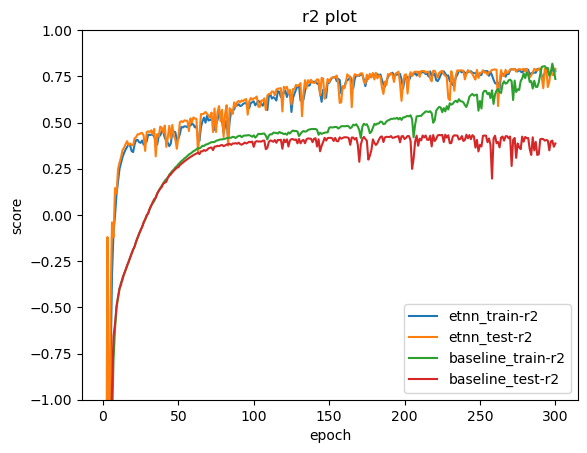

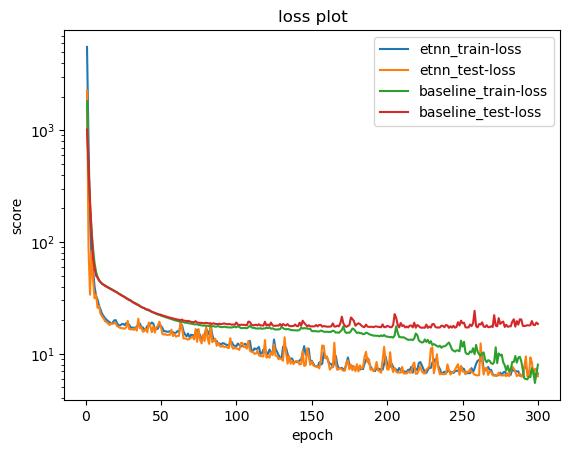

Rank 2 parameter configuration: Unnamed: 0                                      27
number                                          27
value                                     0.374964
datetime_start          2024-05-25 12:34:47.514465
datetime_complete       2024-05-25 12:36:25.661111
duration                    0 days 00:01:38.146646
params_batcher                               False
params_hidden_dim                              384
params_k                                         5
params_learning_rate                      0.002373
state                                     COMPLETE
Name: 27, dtype: object


  7%|▋         | 20/300 [02:07<29:39,  6.36s/it]


KeyboardInterrupt: 

In [4]:
dataset_size = 10000
# define label to show
label = "default"

# load config storage
config_table = pd.read_csv(f"study_label-default_post-normalized_ds-{dataset_size}.csv")

# sort config storage
config_table = config_table.sort_values(by=['value'], ascending=False)

# iterate over top 3 best configs
for i in range(3):
    # get entry from dataframe
    entry = config_table.iloc[i]

    # print information to console
    print(f"Rank {i+1} parameter configuration: {entry}")

    # setup config
    config = ConfigStore(
        in_dim=15,
        hidden_dim=int(entry.params_hidden_dim),
        out_dim=1,
        k=int(entry.params_k),
        dataset=-2,
        ds_size=dataset_size,
        num_gondolas=10,
        num_part_pg=5,
        loss_name='mse',
        optimizer_name='adam',
        num_max_epochs=300,
        learning_rate=float(entry.params_learning_rate),
        batch_size=1024,
        early_stop_tol=5,
        use_equal_batcher=bool(entry.params_batcher),
        seed=420,
        label_type=label,
        final_label_factor=1/1000
    )

    # run config and retrieve idx
    config_idx = run_config(
        config=config,
        dataset_path="../../datasets",
        verbose=True,
        results_folder="../../results",
        check_duplicate=True
    )

    # print number of parameters
    n_params_etnn, n_params_baseline = calc_n_params_config(config)
    print(f"Parameters etnn: {n_params_etnn}\nParameters baseline: {n_params_baseline}")

    # plot results
    create_plot(config_idx, what="r2")
    create_plot(config_idx, what="loss")

## DS size 100000

Rank 1 parameter configuration: Unnamed: 0                                      19
number                                          19
value                                     0.798899
datetime_start          2024-05-25 21:14:02.490605
datetime_complete       2024-05-25 21:37:05.607244
duration                    0 days 00:23:03.116639
params_batcher                               False
params_hidden_dim                              272
params_k                                         2
params_learning_rate                      0.002794
state                                     COMPLETE
Name: 19, dtype: object


100%|██████████| 300/300 [4:44:50<00:00, 56.97s/it]  


Parameters etnn: 422145
Parameters baseline: 442001


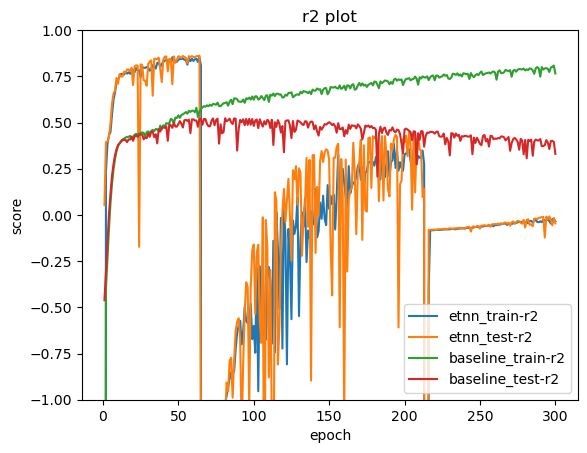

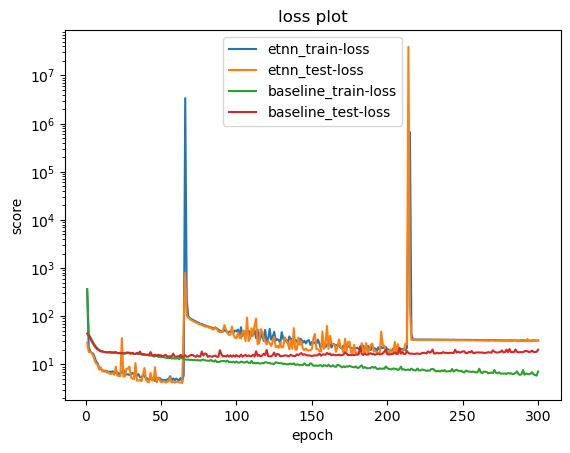

Rank 2 parameter configuration: Unnamed: 0                                      48
number                                          48
value                                     0.795436
datetime_start          2024-05-26 05:20:47.645432
datetime_complete       2024-05-26 05:36:34.274843
duration                    0 days 00:15:46.629411
params_batcher                               False
params_hidden_dim                              224
params_k                                         1
params_learning_rate                      0.004185
state                                     COMPLETE
Name: 48, dtype: object


100%|██████████| 300/300 [3:17:15<00:00, 39.45s/it]  


Parameters etnn: 236769
Parameters baseline: 248099


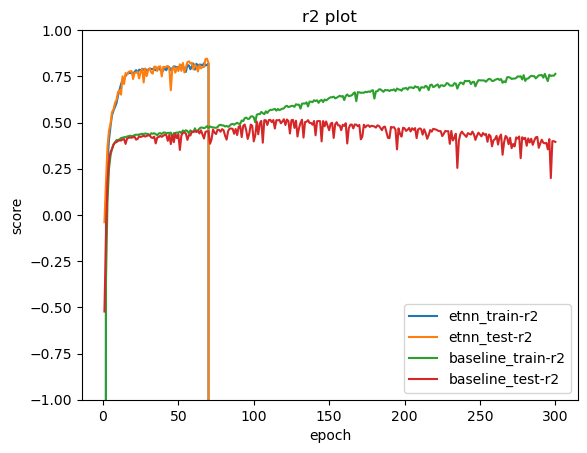

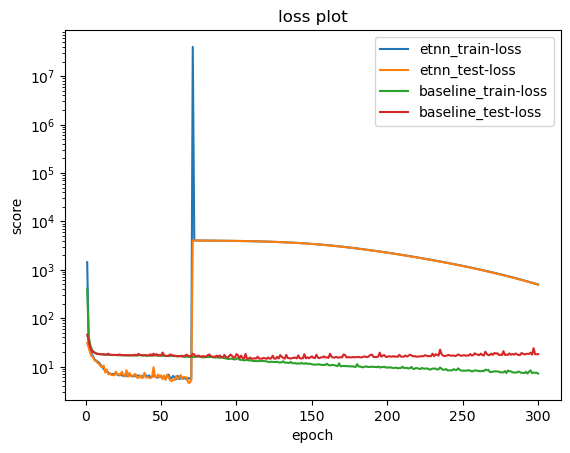

Rank 3 parameter configuration: Unnamed: 0                                      21
number                                          21
value                                     0.789293
datetime_start          2024-05-25 21:59:56.196799
datetime_complete       2024-05-25 22:23:23.579121
duration                    0 days 00:23:27.382322
params_batcher                               False
params_hidden_dim                              368
params_k                                         2
params_learning_rate                      0.002118
state                                     COMPLETE
Name: 21, dtype: object


100%|██████████| 300/300 [3:29:49<00:00, 41.96s/it]  


Parameters etnn: 769857
Parameters baseline: 806555


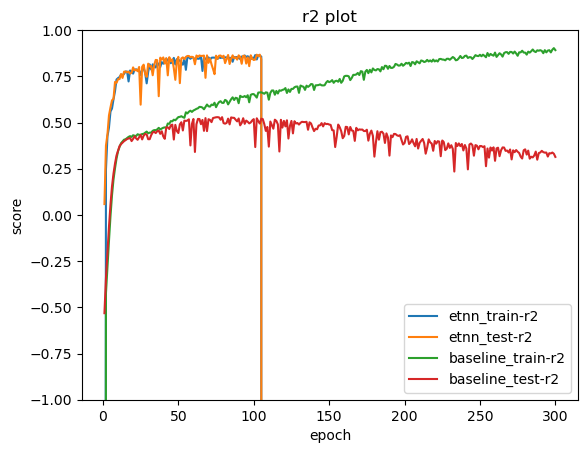

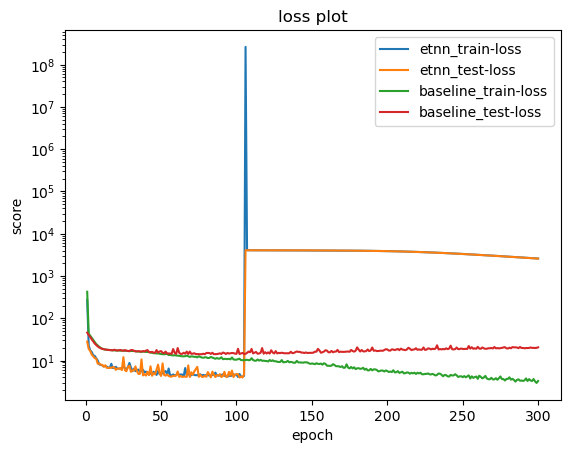

In [4]:
dataset_size = 100000
# define label to show
label = "default"

# load config storage
config_table = pd.read_csv(f"study_label-default_post-normalized_ds-{dataset_size}.csv")

# sort config storage
config_table = config_table.sort_values(by=['value'], ascending=False)

# iterate over top 3 best configs
for i in range(3):
    # get entry from dataframe
    entry = config_table.iloc[i]

    # print information to console
    print(f"Rank {i+1} parameter configuration: {entry}")

    # setup config
    config = ConfigStore(
        in_dim=15,
        hidden_dim=int(entry.params_hidden_dim),
        out_dim=1,
        k=int(entry.params_k),
        dataset=-2,
        ds_size=dataset_size,
        num_gondolas=10,
        num_part_pg=5,
        loss_name='mse',
        optimizer_name='adam',
        num_max_epochs=300,
        learning_rate=float(entry.params_learning_rate),
        batch_size=1024,
        early_stop_tol=5,
        use_equal_batcher=bool(entry.params_batcher),
        seed=420,
        label_type=label,
        final_label_factor=1/1000
    )

    # run config and retrieve idx
    config_idx = run_config(
        config=config,
        dataset_path="../../datasets",
        verbose=True,
        results_folder="../../results",
        check_duplicate=True
    )

    # print number of parameters
    n_params_etnn, n_params_baseline = calc_n_params_config(config)
    print(f"Parameters etnn: {n_params_etnn}\nParameters baseline: {n_params_baseline}")

    # plot results
    create_plot(config_idx, what="r2")
    create_plot(config_idx, what="loss")